<img src="../images/logo.png" alt="slb" style= "width: 1700px"/>

# ⚡️   - Tutorial 2 

💡 The objective of this tutorial is to learn how to create type well curves using production data


Imagine you're managing a group of gas wells in a field. Even though each well's production curve may have a slightly different time lag, their overall shape is similar.

You want to know the median gas production of a new well after a specific amount of time - say, 18 months after it begins producing.

By analyzing the production data from the existing wells, you can create a `type well` curve that represents the median production at each time step

This can help you set realistic production expectations for new well 👇

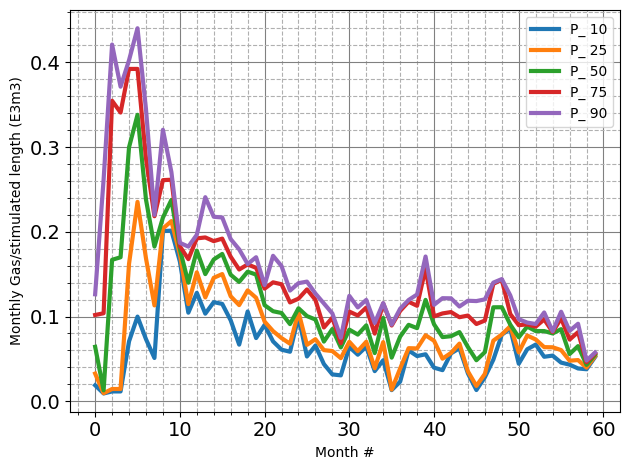

☝ For example from the plot above, the purple curve 'P_90' shows that 90% of the wells have produced less gas than this at each time step

## 🏁 Step 1: Import Required Libraries

In [ ]:
# Import required libraries

import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

## 🏁 Step 2: Understanding Pandas Method Chaining 

💡
An effective way to keep our codes clean and concise is using **method chaining**
<br>
<br>
Here is an example. Instead of writing 👇

new_df = old_df.drop_duplicates<br>
new_df = old_df.drop_na()<br>
new_df = old_df.reset_index()<br>




We can use method chaining like this 👇

new_df = (old_df
          .drop_duplicates()
          .drop_na()
          .reset_index()
         )
<br>
<br>
💥 Some people may argue that you cannot see the intermediate results or have them as separate variables for debugging purposes. 

🏆 However, you can define the following two functions to achieve both objectives: 'show' and 'get_var'

In [ ]:
# Create a function to display a Pandas dataframe with an optional title when working in chain mode

def show(df_, title=None):
    if title:
        display(HTML(f"<h2 >{title}</h2>"))
        display(df_)
    return df_


💊The f at the beginning of the string indicates that this is an f-string and '<h2' is an HTML tag that specifies the heading level

In [ ]:
# Create a function to assign the resulting dataframe to a variable when working in chain mode (method chaining)

def get_var(df_, var_name):
    globals()[var_name] = df_
    return df_

👌 The code globals()[var_name] = df_ assigns the data frame df_ to a global variable with the name specified in the var_name argument. 

This allows us to print or manipulate the resulting data frame within a chain mode workflow

## 🏁 Step 3: Import the Completion Dataset

In [ ]:
# Read and display the completion data (completion_data.csv)



## 🏁 Step 4: Edit the Completion Dataset

👉 Note that the headers of the completion dataset have different formats, so it's a good practice to standardize them. We will also filter the dataset.

We can create a function to make the following changes: 

* Lower case the column names

* Replace the space in column names with underscores (_) 

* Keep the rows when the producing zone= 'zone1'

* Remove the rows when the fluid = 'oil'

👇

In [ ]:
# Create a function to edit the completion dataset as follows:

def prep_completion(df_:pd.DataFrame):  # df_: pd.DataFrame indicates that the argument df_ should be a Pandas DataFrame type
    '''
    this function does the following:

    1- Changes column names to lower case
    2- Replaces space with underscore (_) in column names 
    3- Keep the rows when producing zone= 'zone1'
    4- Removes the rows when fluid column = 'oil'
       
    '''
    return df_tweaked

# 🧹 We use .pipe() to include user-defined functions when working in chain mode

👁‍🗨 The triple quotes ''' are used to define a multi-line string, also known as a docstring, which is used to provide a brief explanation of the function

In [ ]:
# Now let's apply the 'prep_completion' function to the completion dataset

completion = prep_completion(completion)

## 🏁 Step 5: Import the Production Data

Now let's read the production data. 

⚠️ Make sure that the column 'Prod Date' is treated as date

In [ ]:
# Read and Display the production data (production_data.csv)

production = pd.read_csv("../Data/production_data.csv", parse_dates=["Prod Date"]) 

# 👁‍🗨 parse_dates=["Prod Date"]) is used to interpret the "Prod Date" column as a date rather than a string

production

## 🏁 Step 6: Edit the Production Data


👉 Now let's create a function to apply the following changes to the production data:

* Lower case the columns name

* Replace the spaces in column names by underscores (_)

* Set the column'prod_date' as index

In [ ]:
# Create a function to modify the production dataset following the instructions below:

def prep_production (df_):
    '''
    this function does the following:
    
    1- lower case the columns name
    2- Replace spaces by _
    3- set the column 'prod_date' as index
     
    '''
    return df_tweaked
            

🧹Assigning a column to the index can provide a meaningful label for each row, making it easier to identify and manipulate specific rows of data

In [ ]:
# Now let's apply the 'prep_completion' function to the production dataset

production = prep_production(production)

## 🏁 Step 7: Plot the Production Data for the Four Wells

In [ ]:
# Use the function .groupby() to plot the production data for all the wells in a single graph

# We want to group the production data by well ("unformatted_uwi") and display the production ("monthly_gas_(e3m3)") as line chart



## 🏁 Step 8: Use Method Chaining to Merge and Re-format the Production and Completion Datasets

💡 About 80% of the ML workflows involve data cleaning 🧹


Based on the plot generated in the previous step, we can see that the four wells began to produce at different times. This means that we can not directly compare the production of the wells at a particular time (for example 4th month). 

Using method chaining we will re-format the datasets so that we can create type well curves!  

<br>
Here is a summary of the steps included in our sequence: 


* Reset the current index of the production data

* Rename the column 'unformatted_uwi' to 'uwi' for the production data

* Merge the completion and production datasets based on the 'uwi' and 'prod_date' columns

* Sort the dataframe based on the 'prod_date' column

<br>
👀 The steps below involve time normalization 👇


* Create a new column named 'normalized_date' to number each production entry for a well -> (0 - max # of prod. rows)

* Create a new column named 'monthly_gas_per_stimulated_length' and compute 'monthly_gas_(e3m3)' / ddf.stimulated_length

* Drop null values (NaN) from the 'monthly_gas_per_stimulated_length' column

* Set the 'normalized_date' column as index

In [ ]:
# Use method chaining to merge the completion and production datasets and make the following changes to the new dataset 

# 1) Reset the current index
# 2) Rename the column 'unformatted_uwi' to 'uwi'
# 3) Merge the completion and production datasets based on the 'uwi' column
# 4) Sort the dataframe based on the 'uwi' and 'prod_date' columns
# 5) Create a new column named 'normalized_date' to number each production entry for a well -> (0 - max # of prod. rows)
# 6) create a new column named 'monthly_gas_per_stimulated_length' and compute 'monthly_gas_(e3m3)' / stimulated_length
# 7) Drop null values (NaN) from the 'monthly_gas_per_stimulated_length' column
# 8) Set the 'normalized_date' column as index



In [ ]:
# Print the 'prod_comp' dataframe to visualize the changes made

prod_comp

## 🏁 Step 9: Plot the Monthly Production Using the Normalized Time

In [ ]:
# Now let's plot the monthly gas production versus normalized_date 



## 🏁 Step 10: Create Percentiles Using the Production Data from the 4 Wells

💡 Now that we can plot all the wells at normalized time, we can calculate, mean, median, P10, P50, etc.

For this purpose, let's define a function that calculates percentiles and then use it for aggregations 👇

In [ ]:
# Create a function to define custom percentiles

def percentile(n): 
    
    def percentile_(x):  # This nested function returns the nth percentile of an array
        return np.percentile(x, n)  # x= data and n= desired percentile
    
    # Set the name of the nested function to be the corresponding percentile value
    percentile_.__name__ = f'P_{n}'
    
    # Return the nested function
    return percentile_

 👇 The .agg() method is used to aggregate data by applying one or more functions to a specific column (s) of a DataFrame, resulting in a new DataFrame with the aggregated values

In [ ]:
# Let's review what the percentile (n) function does:



# This function computes percentile values (10, 25, 50, 75, 90) for the total monthly gas production of the four wells 

👌 You got the data for type curves!

## 🏁Step 11: Plot Type Well Curves

In [ ]:
# Here we will plot the percentile curves for the first 60 months



# 💥 To filter the data for the first 60 months, we can use either .head(60) or .iloc[0:60]

🏆 Let's create a nicer plot as it is key in decision making 👇

In [ ]:
# First define a custom plotting function

def format_plot(ax, label):

    # Set the y-axis label with a specified font size
    ax.set_ylabel(label, fontdict={'fontsize': 10})

    # Set the x-axis label with a specified font size
    ax.set_xlabel('Month #', fontdict={'fontsize': 10}) 

    # Add a major grid with a gray color and solid line style
    ax.grid(visible=True, which='major', color='gray', linestyle='-')

    # Add a minor grid with a dashed line style
    ax.grid(visible=True, which='minor', linestyle='--')

    # Turn on minor ticks on the x and y axes
    ax.minorticks_on()
    
    # Adjust the subplot layout to minimize the overlap between subplots 
    plt.tight_layout()
    plt.show()

In [ ]:
# Create a function to generate two plots to display the total production for 5 years (60 months)

# The first plot is monthly_gas_per_stimulated_length versus Month # ('normalized_date')
# The second plot is the 'Cum Monthly Gas/stimulated length' versus Month # ('normalized_date')


def plot_type_wells(df: pd.DataFrame, col, col_label, cum_col_label):
    
    

    return
    
# 🧹 Note that the .cumsum() function was aggregated to be able to generate the second plot  

In [ ]:
# Apply the 'plot_type_wells' function to display the monthly and cumulative normalized production plots



🎯 Well done!